## [Lab 4] Linear Regression

  Linear regression is a fundamental statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, allowing us to predict the value of the dependent variable based on the known values of the independent variables.


---

The goal of this lab session is focused on learning linear regression and interpreting its models. We will work with the real-world dataset, apply techniques to fit lines to data points, assess model performance, understand assumptions, and interpret results.

---
 Some of the useful and most important equations:


> Linear Regression Hypothesis : $h(x) = w_{0}+ w_{1}x$



> Linear Regression Model : $y(x) = 1 + 1\cdot x$




> First Partial Derivatives :
> $ \frac{\partial J}{\partial w_{0}} = \frac{1}{m} \sum_{i=1}^{m} (y'^{(i)}-y^{(i)}) $,
> $ \frac{\partial J}{\partial w_{1}} = \frac{1}{m} \sum_{i=1}^{m} (y'^{(i)}-y^{(i)}) \cdot x^{(i)} $



> For the purpose of this lab, we will use [this](https://drive.google.com/file/d/104Cz-K9qiZ0FWnanl09gUULn58M8vau1/view?usp=share_link) dataset. You can download it from the LMS or from the Google Drive link, and upload to your notebook.

> It only contains two columns: house price ($ y $) and size of the house ($ x $).


### 1.   Read and Write operations on a file
In order to analyze and work with our dataset, firstly, we need to read its content. You can use the following code snippet. Additionally, you can use the helper *is_number* function, to handle possible non-numeric values in the columns.

In [ ]:
def is_number(s):
    if s is None: return False
    try:
        complex(s)
    except ValueError:
        return False

    return True

def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = []
            lines = file.readlines()

            keys = lines[0].split(',')
            for i in range(1, len(lines)):
                data_row = [
                    float(cell.strip('\n')) if is_number(cell.strip('\n')) else cell.strip('\n')
                    for cell in lines[i].split(',')
                ]
                data.append(data_row)
            return data
    except FileNotFoundError:
        raise RuntimeError("File not found.")
    except Exception as e:
        raise RuntimeError(f"An error occurred: {e}")

In [ ]:
file_path=r'C:Desktop/Machine Learning/house_price.csv'
with open(file_path,'r') as file:
  data=[]

FileNotFoundError: [Errno 2] No such file or directory: 'C:Desktop/Machine Learning/house_price.csv'

### 2.1. Linear Regression Cost Function

> This function should compute the cost function for a given set of parameters $w_{0}, w_{1}$
(intercept and slope) of a linear regression model, based on the Mean Squared Error (MSE) formula. It iterates over each data point, calculates the predicted value using the current parameters, and accumulates the squared errors. Finally, it divides the sum by $2m$ (the number of data points), to get the average squared error. This function evaluates how well the linear regression model fits the training data.

> The equation for the cost function is:

> $J(w_{0}, w_{1}) = \frac{1}{2m} \sum_{i=1}^{m} (y'^{(i)}-y^{(i)})^2 $, where $y'^{(i)} = h(x^{(i)})$

In [11]:
def linear_reg_cost(w0, w1, x, y):
  pass

In [10]:
def linear_reg_cost(w0,w1,x,y):
  m=len(x)

  errors=0

  for i in range(m):
    y_predicted=w0+w1*x[i]
    squared_errors=(y_predicted-y[i])**2
    errors+=squared_errors

  MSE=(1/(2*m))**errors
  return MSE



In [12]:
w0 = 0.1
w1 = 0.2

x = [1, 2, 3, 4, 5]
y = [1.5, 2.5, 3.5, 4.5, 5.5]


print(linear_reg_cost(w0,w1,x,y))

None


### 2.2. Linear Regression Delta Cost

> This function should compute the gradients of the cost function with respect to the parameters $(w_{0}, w_{1})$.  These gradients represent the direction and magnitude of adjustment needed to minimize the cost function, facilitating optimization techniques like gradient descent. By accumulating errors weighted by the corresponding features, it calculates the partial derivatives of the cost function and then averages these values by dividing by the number of data points $m$.

In [8]:
def linear_reg_delta_cost(w0, w1, x, y):
  pass

In [9]:
def linear_reg_delta_cost(w0,w1,x,y):
  sumY=0
  sumX=0

  m=len(x)

  for i in range(m):
    y_predicted=w0+w1*x[i]
    difference=y_predicted -y[i]

    sumY+=difference
    sumX+=difference*x[i]

  derivationX=sumX/m
  derivationY=sumY/m

  return derivationX,derivationY




In [13]:
w0 = 0.1
w1 = 0.2

x = [1, 2, 3, 4, 5]
y = [1.5, 2.5, 3.5, 4.5, 5.5]

print(linear_reg_delta_cost(w0,w1,x,y))

(-10.0, -2.8)


### 2.3. Training the Linear Regression Model

> To train the model, we are adjusting the slope and intercept values.

> \begin{align*}
    w_0 &:= w_0 - \frac{\partial}{\partial w_0} J(w_0, w_1) \\
    w_1 &:= w_1 - \frac{\partial}{\partial w_1} J(w_0, w_1)
\end{align*}

The adjustment of weights is a crucial step in the optimization process. It occurs through gradient descent which measures the disparity between predicted and actual values. By iteratively updating the weights in the direction opposite to the gradient of the cost function, the algorithm seeks to descend towards the minimum of the cost function, thereby refining the model's parameters to better fit the data.


In [4]:
def train_linear_reg(x,
                     y,
                     w0 = 0,
                     w1 = 0,
                     learning_rate = 0.0000004,
                     num_iterations = 1000,
                     logging = False):
  pass

In [5]:
def train_linear_reg(x,y,w0,w1,learning_rate,num_iterations,logging=False):
  m=len(x)
  costs=[]

  for i in range(num_iterations):
    y_predicted=[w0+w1*xi for xi in x]


    gradientW0=(1/m)*sum([(y_predicted[j]-yi) for j, yi in enumerate(y)])
    gradientW1=(1/m)*sum([(y_predicted[j]-yi) * xi for j, (xi,yi) in enumerate(zip(x,y))])

    w0 -= learning_rate * gradientW0
    w1 -= learning_rate * gradientW1

    cost=linear_reg_cost(w0,w1,x,y)
    costs.append(cost)
    if logging:
      print(f"Iteration {i+1}: Cost = {cost}")

  return w0, w1, costs


In [14]:
w0 = 0.1
w1 = 0.2

x = [1, 2, 3, 4, 5]
y = [1.5, 2.5, 3.5, 4.5, 5.5]

learning_rate=0.0000000004
num_iterations=1000
logging=False

print(train_linear_reg(x,y,w0,w1,learning_rate,num_iterations,logging))

(0.10000111999737864, 0.20000399999053745, [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, No

Of course, you will adjust these parameters according to your preference.

#### 2.4. Visualization
> You can try to plot and visualize the regression line alongside the data points, to assess the model's fit and to see its performance when the adjustment of parameters is done. Below, you can find a helper column function, that will extracts a specific column. In our case, it is used to find the values of dependant and independant variable from our dataset.

In [16]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [15]:
matrix=[[2,4,5],[3,7,10],[70,80,45]]
i=1
print(column(matrix,i))


[4, 7, 80]


In [17]:
import matplotlib.pyplot as plt

### 3. Vectorization


> Vectorization is a technique that performs operations on entire arrays or matrices in a single operation rather than looping through each element individually. Now, your task is to implement and to train the linear regression model, by using the vectorization. Your method skeleton will look a bit different now and you will need to rewrite them, by using the matrix methods covered last week.



#### 3.1. Linear Regression Cost Function
> This function takes three matrices as the parameters:


*   $ w $ (vector of weights, that contains slope and intercept for the independent variable)
*  $ x $ (matrix of input features - each row of $x$ corresponds to a single entry data point)
*  $ y $ (vector of each target value --> dependant variables)

> By using the matrix methods that we implemented last week, implement this cost function.

> **A bit of a tip**: To calculate the predicted values, use the matrix multiplication. To calculate the difference between actual and predicted values, use the diff method. The only thing left is to compute the square difference and divide it with the number of data points doubled.

In [ ]:
def linear_reg_cost(w, x, y):
  pass

In [22]:
def linear_reg_cost(w,x,y):
  m=len(y)
  sum_squared_diff=0

  for i in range(m):
    y_predicted_i=w[0]+w[1]*x[i]
    difference_i=(y_predicted_i-y[i])**2
    sum_squared_diff+=difference_i

  cost=sum_squared_diff/(2*m)
  return cost


In [23]:
w= [1,2]
x = [1, 2, 3, 4, 5,6]
y = [2,3,4,5,6]

print(linear_reg_cost(w,x,y))

5.5


#### 3.2. Linear Regression Delta Cost Function
> To calculate the vectorized gradient, **here is a hint**. Firstly compute the predicted values and the difference between the actual and predicted values. Next, transpose the input features ($x$) and perform matrix multiplication to calculate the weighted sum of feature errors. At the end, scale the result by the inverse of the number of data points ($m$), to obtain the average gradient.

In [24]:
def linear_reg_delta_cost(w, x, y):
  pass

In [50]:
def linear_reg_delta_cost(w, x, y):
    m = len(y)
    sum_elements = [0] * len(w)

    for i in range(m):
        y_predicted = sum(w[j] * x[i][j] for j in range(len(w)))

        difference = y_predicted - y[i]

        for j in range(len(w)):
            sum_elements[j] += difference * x[i][j]

    gradient = [sum_elements[j] / m for j in range(len(w))]
    return gradient




In [51]:
w = [0.1, 0.2]
x = [[1, 2], [1, 3], [1, 5]]
y = [2.3, 4.5, 6.2]

gradient = linear_reg_delta_cost(w, x, y)
print("Our calculated gradient is:", gradient)

Our calculated gradient is: [-3.5666666666666664, -13.5]


#### 3.3. Training the Linear Regression Model

> As we mentioned above, the algorithm continuously adjusts the weights in a manner that moves them away from the direction where the cost function increases the most, aiming to approach the minimum of the cost function. This iterative process enables the algorithm to gradually refine the model's parameters, enhancing its ability to accurately capture the patterns in the data. The logic for this function stays the same as for the initial one; you will just need to adjust your code, to use the matrix methods, instead of writing the loops and iterating through elements. The function should return the optimized parameter $ w$ and the final cost.

In [27]:
def train_linear_reg(x,
                     y,
                     w,
                     learning_rate = 0.0000004,
                     num_iterations = 1000,
                     logging = True):
  pass

In [39]:
def train_linear_reg(x, y, w, learning_rate, num_iterations, logging=False):
    m = len(x)


    cost_history = []

    for i in range(num_iterations):
        y_pred = [w[0] + w[1] * xi for xi in x]
        errors = [y_pred[j] - y[j] for j in range(m)]
        grad_w0 = sum(errors) / m
        grad_w1 = sum([errors[j] * x[j] for j in range(m)]) / m

        w[0] -= learning_rate * grad_w0
        w[1] -= learning_rate * grad_w1


        cost = sum([(errors[j] ** 2) for j in range(m)]) / (2 * m)


        cost_history.append(cost)
        if logging and (i + 1) % 10 == 0:
            print("Iteration {}, Cost: {}".format(i + 1, cost))


    return w, cost_history[-1]


In [41]:
x_train = [1, 2, 3, 4, 5]
y_train = [2, 4, 5, 4, 5]

initial_w = [0, 0]
learning_rate = 0.01
num_iterations = 100

optimized_w, final_cost = train_linear_reg(x_train, y_train, initial_w, learning_rate, num_iterations, logging=True)


print("Optimized weights:", optimized_w)
print("Final cost:", final_cost)


Iteration 10, Cost: 1.3880624884453763
Iteration 20, Cost: 0.611637419309193
Iteration 30, Cost: 0.5397728346866021
Iteration 40, Cost: 0.5250032359733958
Iteration 50, Cost: 0.515134065543037
Iteration 60, Cost: 0.5059486199257444
Iteration 70, Cost: 0.49709743451512345
Iteration 80, Cost: 0.4885430552128612
Iteration 90, Cost: 0.48027348430514943
Iteration 100, Cost: 0.4722790745563475
Optimized weights: [0.6051164658853391, 1.0417530517794173]
Final cost: 0.4722790745563475


3.4. Visualization & Plotting
> Additionally, you can try to plot and visualize the regression line alongside the data points.

In [37]:
import matplotlib.pyplot as plt

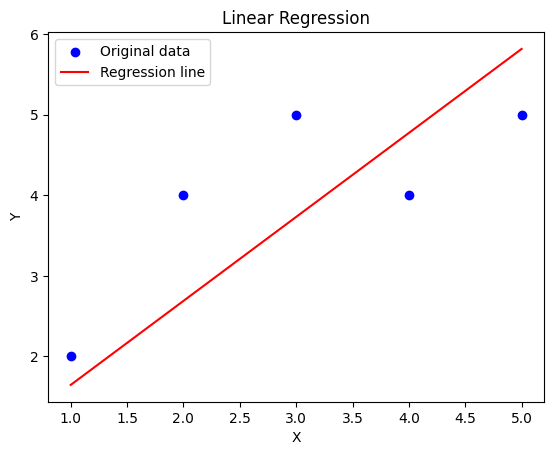

In [44]:
plt.scatter(x_train, y_train, color='blue', label='Original data')

predicted_y = [optimized_w[0] + optimized_w[1] * x for x in x_train]
plt.plot(x_train, predicted_y, color='red', label='Regression line')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()


plt.show()